# SAT vs GPA: Regression Analysis with OLS and Sklearn

## Introduction

This notebook explores the relationship between SAT scores and GPA using both Ordinary Least Squares (`OLS`) regression and `Sklearn`'s Linear Regression. We aim to evaluate the differences between these two approaches and assess the importance of feature selection in predictive modeling. The dataset includes variables such as SAT scores, GPA, attendance, and a random categorical variable.

## 1. Loading the Dataset

The dataset comprises the following variables:
- **SAT**: Students' SAT scores.
- **GPA**: Grade Point Average.
- **Attendance**: Class attendance status (Yes/No).
- **Rand 1,2,3**: A random categorical variable for additional analysis.

We will perform:
1. Simple regression: GPA vs SAT.
2. Multivariate regression: GPA vs [SAT, Attendance].
3. Multivariate regression with randomness: GPA vs [SAT, Attendance, Rand 1,2,3].

## 2. Data Preprocessing

Before fitting our models, we preprocess the data by creating dummy variables for categorical predictors like Attendance. This step is crucial for converting categorical data into a numerical format suitable for regression analysis.

## 3. Model Fitting

### 3.1. Simple Regression
We begin by fitting a simple linear regression model to predict GPA based solely on SAT scores. This provides a baseline understanding of their direct relationship.

### 3.2. Multivariate Regression
Next, we extend our analysis by including Attendance as an additional predictor. This multivariate approach helps us understand how attendance influences GPA when combined with SAT scores.

### 3.3. Regression with Randomness
Finally, we incorporate the random categorical variable (Rand 1,2,3) to explore its impact on model performance and feature selection.


In [3]:
#Always be sure to import the necessary python libraries, if necessary install packages 
#via pip install in your terminal or via conda install in anaconda prompt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [4]:
# Override Matplotlib styles with Seaborn's default style
sns.set_theme()

# Load the dataset
raw_data = pd.read_csv('SAT_GPA.csv')
data = raw_data.copy()

# Generate the random feature
np.random.seed(42)
data['Rand 1,2,3'] = np.random.choice([1, 2, 3], size=len(data))

# Save the updated DataFrame to a CSV file
raw_data.to_csv("SAT_GPA_wth_Rand.csv", index=False)

# Display the first rows of the dataset
data.head()


,SAT,GPA,Attendance,"Rand 1,2,3"
0,1714,2.40,No,3
1,1664,2.52,No,1
2,1760,2.54,No,3
3,1685,2.74,No,3
4,1693,2.83,No,1


## 3.1. Simple Linear Regression: GPA vs SAT
We perform simple linear regression using:
1. OLS (Ordinary Least Squares) via `statsmodels`.
2. Linear regression via `sklearn`.

This section includes scatter plots of GPA vs SAT and compares model outputs side by side.


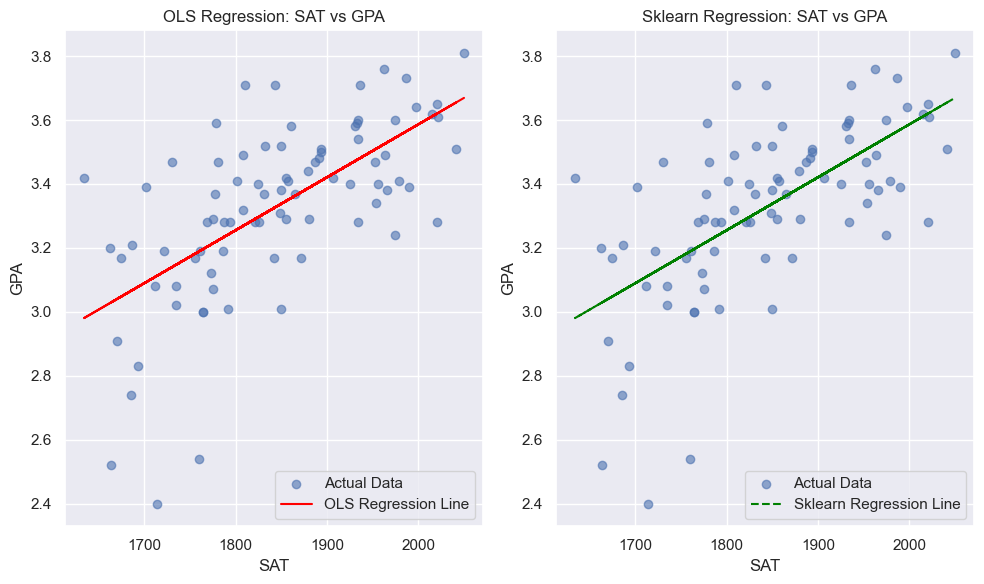

In [5]:
# Define variables
X_simple = data['SAT']
y = data['GPA']

# Add a constant for OLS
X_simple_ols = sm.add_constant(X_simple)

# OLS Regression
ols_model = sm.OLS(y, X_simple_ols).fit()

# Sklearn Regression
sklearn_model = LinearRegression()
sklearn_model.fit(X_simple.values.reshape(-1, 1), y)

# Predictions
y_pred_ols = ols_model.predict(X_simple_ols)
y_pred_sklearn = sklearn_model.predict(X_simple.values.reshape(-1, 1))

# Set the figure size before plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size (14 inches by 6 inches)

# First plot for OLS (position 1 in the grid)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.scatter(X_simple, y, label="Actual Data", alpha=0.6)
plt.plot(X_simple, y_pred_ols, color='red', label="OLS Regression Line")
plt.title("OLS Regression: SAT vs GPA")
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.legend()

# Second plot for Sklearn (position 2 in the grid)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.scatter(X_simple, y, label="Actual Data", alpha=0.6)
plt.plot(X_simple, y_pred_sklearn, color='green', linestyle='--', label="Sklearn Regression Line")
plt.title("Sklearn Regression: SAT vs GPA")
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## Model Comparison: R-squared, Adjusted R-squared, and MSE

### R-squared Formula
R-squared (also called the coefficient of determination) represents the proportion of the variance in the dependent variable (GPA) that is predictable from the independent variables (e.g., SAT, Attendance).

The formula for R-squared is:

$$R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$$

Where:
- $y_i$ is the actual value,
- $\hat{y}_i$ is the predicted value,
- $\bar{y}$ is the mean of the actual values.

### Adjusted R-squared Formula
Adjusted R-squared adjusts the R-squared value for the number of predictors in the model. It is used to determine how well the model generalizes to new data and penalizes the inclusion of unnecessary variables.

The formula for Adjusted R-squared is:

$$R^2_{adj} = 1 - \left( \frac{(1 - R^2) \cdot (n - 1)}{n - p - 1} \right)$$

Where:
- $n$ is the number of observations (data points),
- $p$ is the number of predictors (independent variables).

### Mean Squared Error (MSE) Formula
The Mean Squared Error (MSE) measures the average squared difference between the actual values and the predicted values. A lower MSE indicates better model performance.

The formula for MSE is:

$$MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2$$

Where:
- $y_i$ is the actual value,
- $\hat{y}_i$ is the predicted value,
- $n$ is the number of observations.

### Differences in Formulas:
- **R-squared** measures the proportion of variance explained by the model.
- **Adjusted R-squared** accounts for the number of predictors, reducing the risk of overfitting.
- **MSE** gives an absolute measure of model accuracy by calculating the squared difference between actual and predicted values.

### Model Comparison:
- **OLS** provides both **R-squared** and **Adjusted R-squared** in its summary, while **Sklearn** requires manual calculation for Adjusted R-squared.
- **MSE** is used to assess how well the model predicts the actual values, and it is useful for comparing models with different numbers of predictors.

### Discussion of Metrics
- **R-squared**: Indicates how well the model explains the variance in the dependent variable. Higher values indicate better model fit, but it can be misleading if the model has too many predictors.
- **Adjusted R-squared**: Provides a more accurate measure by adjusting for the number of predictors. It helps to determine whether adding more variables improves the model or just leads to overfitting.
- **MSE**: Provides an absolute measure of model performance. A lower MSE indicates that the predictions are closer to the actual values. It is especially useful when comparing models with different configurations.

In [6]:
# R-squared and Adjusted R-squared for OLS
r_squared_ols = ols_model.rsquared
adj_r_squared_ols = ols_model.rsquared_adj

# R-squared for Sklearn
r_squared_sklearn = sklearn_model.score(X_simple.values.reshape(-1, 1), y)
adj_r_squared_sklearn = 1 - (1 - r_squared_sklearn) * (len(y) - 1) / (len(y) - X_simple.values.reshape(-1, 1).shape[1] - 1)

# MSE for both models
mse_ols = mean_squared_error(y, y_pred_ols)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

# Update the results comparison
simple_reg_results = pd.DataFrame({
    'Model': ['OLS', 'Sklearn'],
    'Intercept': [ols_model.params['const'], sklearn_model.intercept_],
    'Slope': [ols_model.params['SAT'], sklearn_model.coef_[0]],
    'MSE': [mse_ols, mse_sklearn],
    'R-squared': [r_squared_ols, r_squared_sklearn],
    'Adjusted R-squared': [adj_r_squared_ols, adj_r_squared_sklearn]
})

simple_reg_results

,Model,Intercept,Slope,MSE,R-squared,Adjusted R-squared
0,OLS,0.27504,0.001656,0.043301,0.406004,0.39876
1,Sklearn,0.27504,0.001656,0.043301,0.406004,0.39876


### Analysis of Results:

- **Intercept & Slope**: Both models yield identical values, indicating a consistent linear relationship between SAT and GPA.
- **MSE**: The MSE for both models is 0.043301, showing similar data fit.
- **R-squared**: Both models have an R-squared of 0.406004, meaning 40.6% of GPA variation is explained by SAT scores.
- **Adjusted R-squared**: Identical values (0.39876) suggest similar model performance after accounting for predictors.

In conclusion, the OLS's `statsmodels` and `sklearn` models produce nearly identical results, demonstrating their equivalence in this analysis.


## 3.2. Multivariate Regression: GPA vs [SAT, Attendance]
We expand the model to include `Attendance` as an additional feature, examining its impact on GPA predictions.


### Addition of p-value in model comparison

The **p-value** is a statistical measure used to determine the significance of individual predictors in a regression model. It indicates whether the corresponding feature significantly contributes to the model, with a smaller p-value suggesting that the feature is more important for predicting the target variable.

- **Interpretation**: 
  - A low p-value (typically < 0.05) indicates that the null hypothesis (which suggests that the predictor has no effect) can be rejected, and the feature is statistically significant.
  - A high p-value (typically > 0.05) suggests that the feature may not have a significant effect on the target variable, and thus, it might not be necessary in the model.
  
- **p-value in OLS**:
  - In the OLS regression model, p-values are directly provided by `statsmodels` and represent the significance of each predictor (including the intercept and each feature).
  
- **p-value in Sklearn**:
  - `sklearn` does not directly provide p-values. However, we can compute p-values using `f_regression` from `sklearn.feature_selection`. This function calculates the p-values for each feature in the regression, based on univariate statistical tests.
  - Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html
  
- **Use in Model Comparison**:
  - The p-values for the predictors in both OLS and Sklearn models are used to assess which variables significantly affect the target variable (in this case, `GPA`). Comparing the p-values from both models allows us to determine if any features are excluded or included unjustifiably in the models based on their significance.


In [7]:
# Lets remember all the data looks like:
data.head()

,SAT,GPA,Attendance,"Rand 1,2,3"
0,1714,2.40,No,3
1,1664,2.52,No,1
2,1760,2.54,No,3
3,1685,2.74,No,3
4,1693,2.83,No,1


## 2. Data Preprocessing - map Data

Handle non-numeric data:
- Encode categorical data, for instance 'Attendance' is a binary category ('Yes'/'No'), you can encode it:

In [8]:
mapped_data = data.copy()
mapped_data['Attendance'] = mapped_data['Attendance'].map({'Yes': 1, 'No': 0})
mapped_data.head(20)

,SAT,GPA,Attendance,"Rand 1,2,3"
0,1714,2.40,0,3
1,1664,2.52,0,1
2,1760,2.54,0,3
3,1685,2.74,0,3
4,1693,2.83,0,1
5,1670,2.91,0,1
6,1764,3.00,0,3
7,1764,3.00,0,2
8,1792,3.01,0,3
9,1850,3.01,0,3


In [9]:
mapped_data.describe()

,SAT,GPA,Attendance,"Rand 1,2,3"
count,84.000000,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286,2.071429
std,104.530661,0.271617,0.501718,0.772817
min,1634.000000,2.400000,0.000000,1.000000
25%,1772.000000,3.190000,0.000000,1.000000
50%,1846.000000,3.380000,0.000000,2.000000
75%,1934.000000,3.502500,1.000000,3.000000
max,2050.000000,3.810000,1.000000,3.000000


In [26]:
from sklearn.feature_selection import f_regression

def model_comparison_metrics(x, y, model_ols=True, model_sklearn=True, metrics=None):
    """
    Compare linear regression models using OLS and Sklearn methods.

    Parameters:
    x : pd.DataFrame or pd.Series
        Features for regression.
    y : pd.Series
        Target variable.
    model_ols : bool, optional
        Whether to calculate metrics for OLS model. Default is True.
    model_sklearn : bool, optional
        Whether to calculate metrics for Sklearn model. Default is True.
    metrics : list, optional
        List of metrics to calculate (e.g., ['MSE', 'R-squared']).
        Default is ['MSE', 'R-squared', 'Adjusted R-squared', 'p-value'].

    Returns:
    comparison_df : pd.DataFrame
        DataFrame containing calculated metrics for each model.
    y_pred_ols : np.ndarray or None
        Predictions from OLS model.
    y_pred_sklearn : np.ndarray
        Predictions from Sklearn model.
    """
    if metrics is None:
        metrics = ['MSE', 'R-squared', 'Adjusted R-squared', 'p-value']
    
    # Ensure x is a DataFrame for compatibility with sklearn
    if isinstance(x, pd.Series):
        x = x.to_frame()

    # Sklearn model
    sklearn_model = LinearRegression()
    sklearn_model.fit(x, y)
    y_pred_sklearn = sklearn_model.predict(x)
    
    # Calculate F-statistic and p-values using f_regression
    f_stats, p_values = f_regression(x, y)
    
    # OLS model
    if model_ols:
        X_ols = sm.add_constant(x)
        ols_model = sm.OLS(y, X_ols).fit()
        y_pred_ols = ols_model.predict(X_ols)
    else:
        ols_model = None
        y_pred_ols = None
    
    results = {
    'Intercept': [None, sklearn_model.intercept_],
    'MSE': [None, mean_squared_error(y, y_pred_sklearn)],
    'R-squared': [None, sklearn_model.score(x, y)],
    'Adjusted R-squared': [None, None],  # Initialize with two elements
    'p-value (Intercept)': [None]
    }

    # Add columns for each feature's coefficient dynamically
    for feature in x.columns:
        results[f'{feature}_coef'] = [None, None]  # Initialize with two None values
        results[f'p-value ({feature})'] = [None, None]  # Initialize p-values as None

    if ols_model:
        # Fill in OLS model results
        results['Intercept'][0] = ols_model.params['const']
        results['MSE'][0] = mean_squared_error(y, y_pred_ols)
        results['R-squared'][0] = ols_model.rsquared
        results['Adjusted R-squared'][0] = ols_model.rsquared_adj
        results['p-value (Intercept)'][0] = ols_model.pvalues['const']
        
        # Populate OLS coefficients and p-values for each feature
        for feature in x.columns:
            results[f'{feature}_coef'][0] = ols_model.params[feature]
            results[f'p-value ({feature})'][0] = ols_model.pvalues[feature]

    # Populate Sklearn coefficients for each feature
    for i, feature in enumerate(x.columns):
        results[f'{feature}_coef'][1] = sklearn_model.coef_[i]

    # Calculate adjusted R-squared for Sklearn
    r_squared_sklearn = sklearn_model.score(x, y)
    adj_r_squared_sklearn = 1 - (1 - r_squared_sklearn) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
    results['Adjusted R-squared'][1] = adj_r_squared_sklearn

    # Add p-values for Sklearn using f_regression
    f_stats, p_values = f_regression(x, y)
    for i, feature in enumerate(x.columns):
        results[f'p-value ({feature})'][1] = p_values[i]

    # Convert results to a DataFrame
    comparison_df = pd.DataFrame(results, index=['OLS', 'Sklearn'])

    # Start with fixed columns
    base_columns = ['Intercept', 'p-value (Intercept)', 'MSE', 'R-squared', 'Adjusted R-squared']
    
    # Dynamically generate coefficient and p-value columns for predictors
    predictor_columns = []
    for predictor in x.columns:
        predictor_columns.append(f'{predictor}_coef')
        predictor_columns.append(f'p-value ({predictor})')
    
    # Combine and filter based on actual columns in comparison_df
    desired_order = base_columns[:2] + predictor_columns + base_columns[2:]
    actual_order = [col for col in desired_order if col in comparison_df.columns]

    # Reorder the DataFrame columns
    comparison_df = comparison_df[actual_order]

    return comparison_df, y_pred_ols, y_pred_sklearn


In [33]:
# Example DataFrame for `x` and `y`
x_multi = mapped_data[['SAT', 'Attendance']]  # Multivariate features
y = mapped_data['GPA']  # Target variable

# Get model comparison metrics
multi_reg_results, y_pred_ols, y_pred_sklearn = model_comparison_metrics(x_multi, y)
multi_reg_results

,Intercept,p-value (Intercept),SAT_coef,p-value (SAT),Attendance_coef,p-value (Attendance),MSE,R-squared,Adjusted R-squared
OLS,0.64385,0.075994,0.0014,3.601434e-10,0.222644,5.266310e-07,0.031678,0.565439,0.554709
Sklearn,0.64385,0.075994,0.0014,7.199518e-11,0.222644,1.132159e-07,0.031678,0.565439,0.554709


In [34]:
#remember the previous table, now with the new function:
x_simple = mapped_data['SAT'] 
y = mapped_data['GPA']

# Get model comparison metrics
multi_reg_results, y_pred_ols, y_pred_sklearn = model_comparison_metrics(x_simple, y)
multi_reg_results

,Intercept,p-value (Intercept),SAT_coef,p-value (SAT),MSE,R-squared,Adjusted R-squared
OLS,0.27504,0.502904,0.001656,7.199518e-11,0.043301,0.406004,0.39876
Sklearn,0.27504,0.502904,0.001656,7.199518e-11,0.043301,0.406004,0.39876


## 3.3. Multivariate Regression with Randomness
Adding a random feature (`Rand 1,2,3`) allows us to test the impact of irrelevant features and the power of feature selection.


In [35]:
x_wrand = mapped_data[['SAT', 'Attendance', 'Rand 1,2,3']] #added randomness
y = mapped_data['GPA']

# Get model comparison metrics
multi_reg_results, y_pred_ols, y_pred_sklearn = model_comparison_metrics(x_wrand, y)
multi_reg_results

,Intercept,p-value (Intercept),SAT_coef,p-value (SAT),Attendance_coef,p-value (Attendance),"Rand 1,2,3_coef","p-value (Rand 1,2,3)",MSE,R-squared,Adjusted R-squared
OLS,0.70549,0.052656,0.001407,2.680269e-10,0.222655,4.695148e-07,-0.036197,0.161185,0.030906,0.576038,0.560139
Sklearn,0.70549,0.052656,0.001407,7.199518e-11,0.222655,1.132159e-07,-0.036197,0.438792,0.030906,0.576038,0.560139


### Discussion
- Adding a random feature did not significantly improve the model, indicating its irrelevance.
- Both `OLS` and `sklearn` correctly assigned negligible weight to the random feature.
- This highlights the importance of feature selection in avoiding overfitting.

## 4. Overall Discussion

Our analysis reveals several important insights:

1. **Feature Selection**: Including additional predictors like Attendance improves model fit, as indicated by higher R-squared values. However, adding random variables without theoretical justification can lead to misleading interpretations.

2. **Model Comparison**: Both `OLS` and `sklearn` models yield similar results in terms of coefficients and model fit metrics. This consistency suggests that either approach is suitable for linear regression tasks with this dataset.

3. **Statistical Significance**: The p-values indicate that SAT scores are a significant predictor of GPA across all models, while Attendance shows varying significance depending on model specification.

4. **Random Variable Impact**: The inclusion of "Rand 1,2,3" demonstrates minimal impact on model performance. The p-value for this variable is much higher than an alpha level of 5%, indicating it is not statistically significant. This highlights the importance of thoughtful feature selection based on domain knowledge rather than arbitrary inclusion.

## Conclusion

In conclusion, this notebook effectively demonstrates how to conduct regression analysis using both OLS and Sklearn methods while emphasizing the importance of feature selection in predictive modeling. Our findings underscore that while SAT scores are a strong predictor of GPA, additional factors like attendance can enhance model accuracy when appropriately incorporated.

The analysis also illustrates the potential pitfalls of including irrelevant features, such as "Rand 1,2,3," which do not contribute meaningfully to the model due to their lack of statistical significance.

Future work could involve exploring non-linear models or incorporating interaction terms to capture more complex relationships within educational data.